In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('TRAIN.csv')

In [3]:
df.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.describe()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,62987.000000,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,36365.417068,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,1.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31494.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62987.000000,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,94480.000000,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,125973.000000,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 125973 artists>

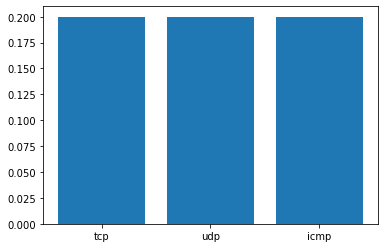

In [6]:
plt.bar(data=df,x='protocol_type',height=.2)

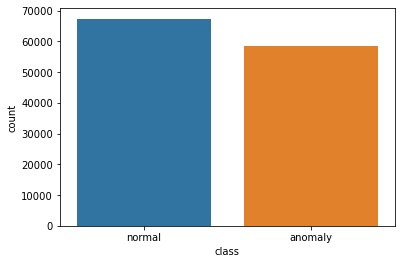

In [7]:
sns.countplot(data=df,x='class')
plt.show()

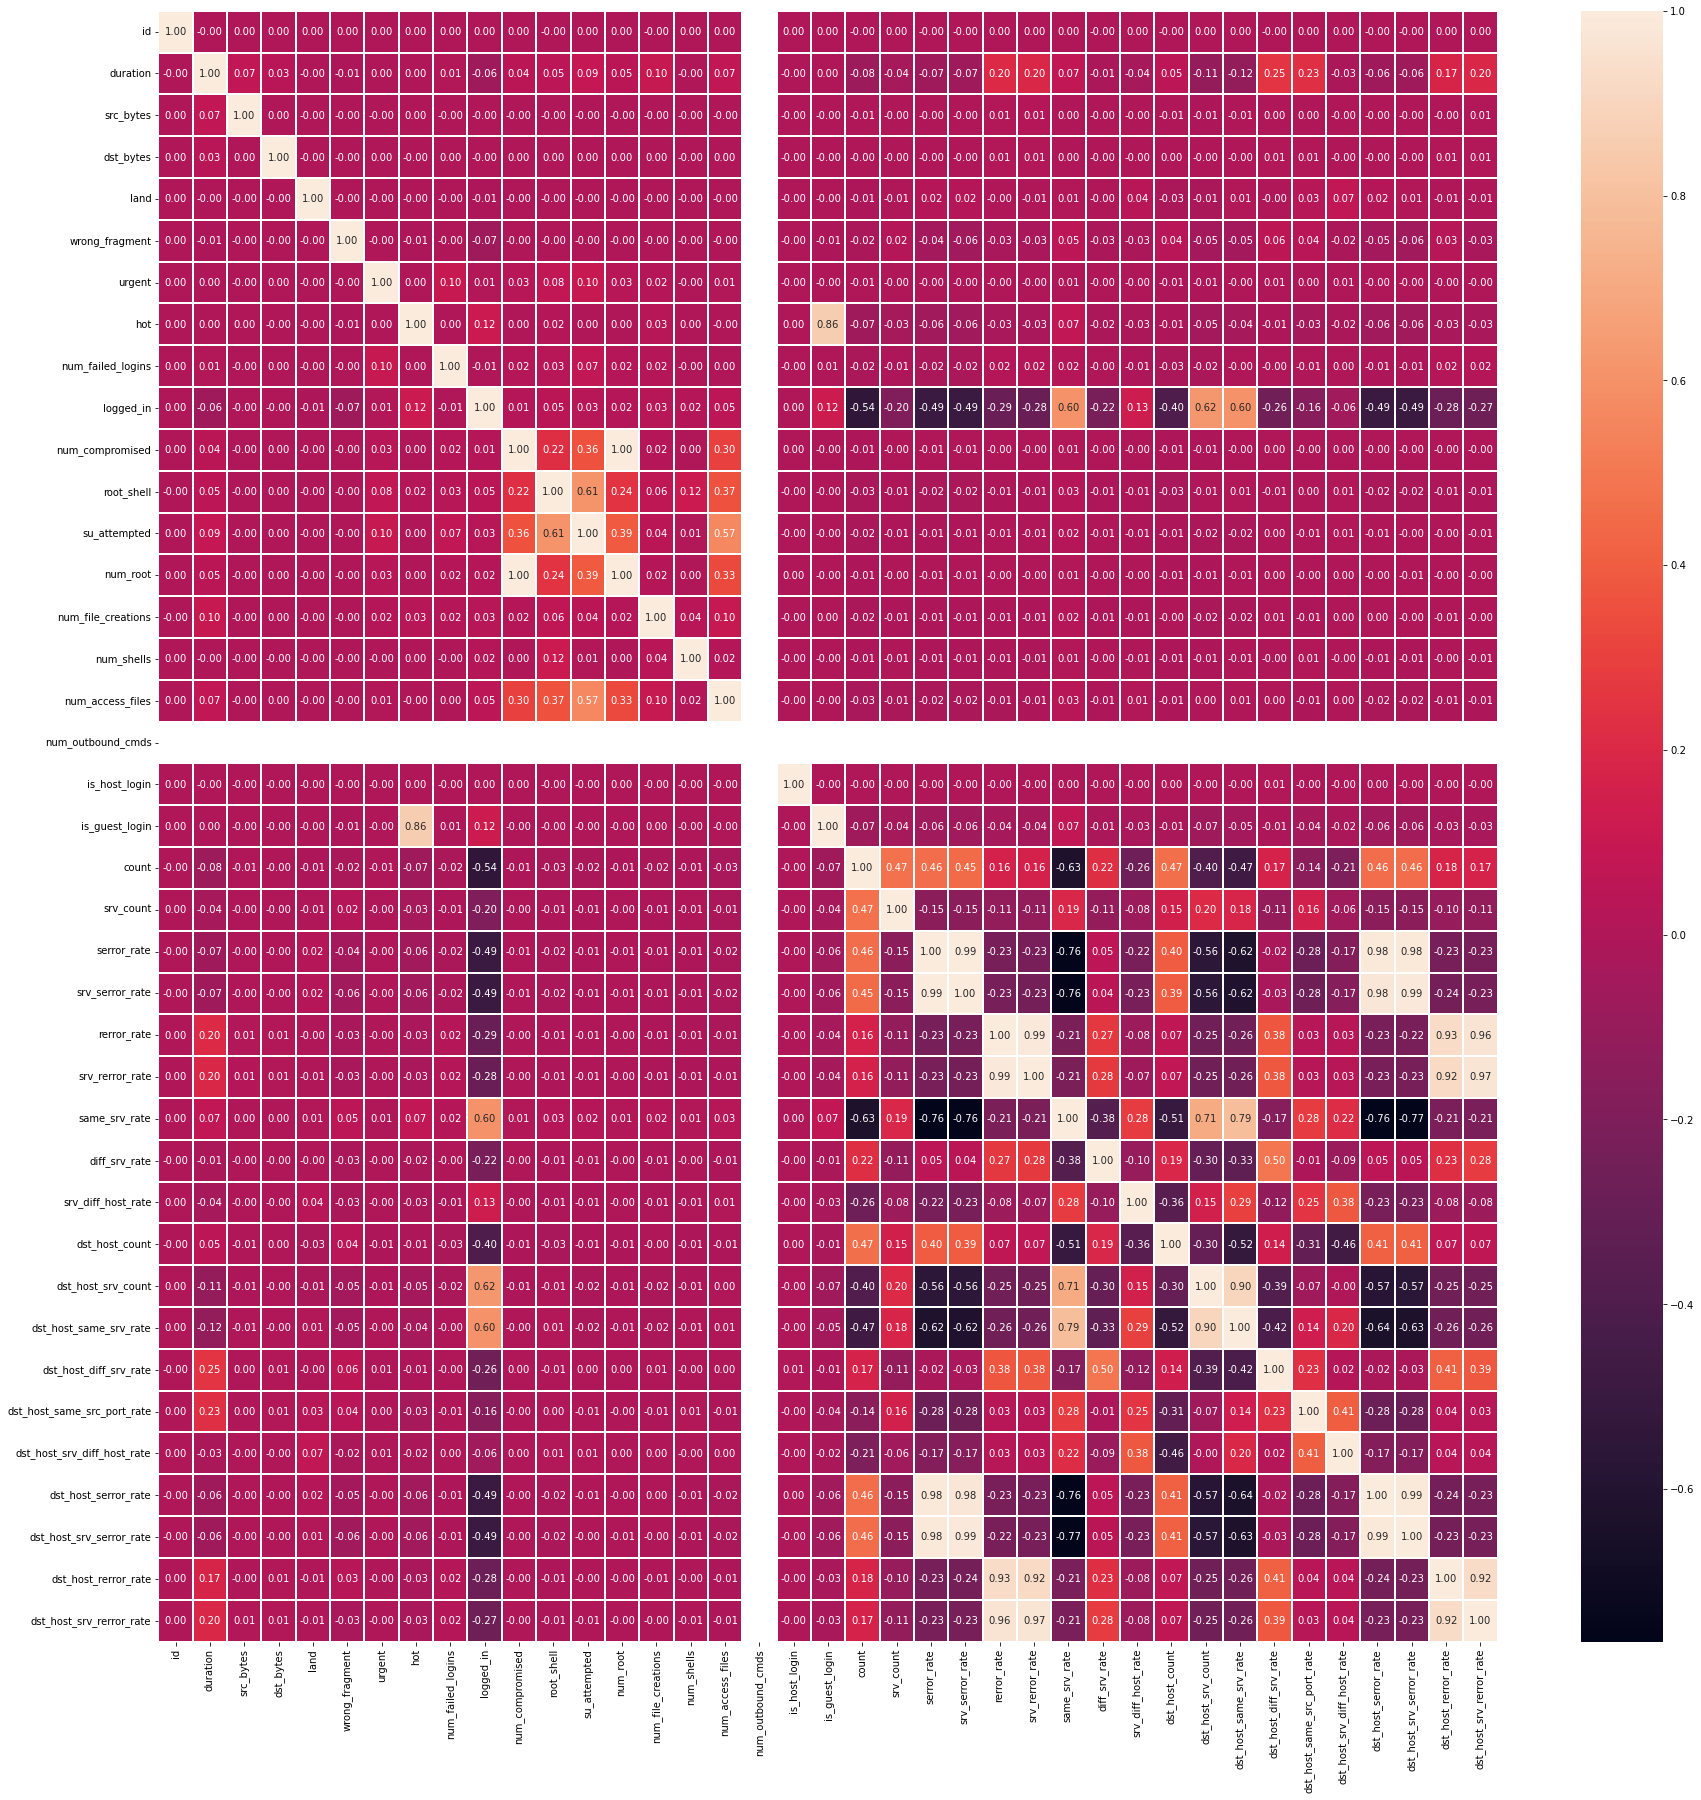

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(data=df.corr(),annot=True,linewidths=.3,fmt="1.2f")
plt.show()

In [9]:
x = df.drop(columns = ['srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate','class'])
y = df["class"]

In [10]:
x

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0.0
1,2,0,udp,other,SF,146,0,0,0,0,...,0,0,0,0,0,0,0,13,1,0.0
2,3,0,tcp,private,S0,0,0,0,0,0,...,0,0,0,0,0,0,0,123,6,1.0
3,4,0,tcp,http,SF,232,8153,0,0,0,...,0,0,0,0,0,0,0,5,5,0.2
4,5,0,tcp,http,SF,199,420,0,0,0,...,0,0,0,0,0,0,0,30,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,125969,0,tcp,private,S0,0,0,0,0,0,...,0,0,0,0,0,0,0,184,25,1.0
125969,125970,8,udp,private,SF,105,145,0,0,0,...,0,0,0,0,0,0,0,2,2,0.0
125970,125971,0,tcp,smtp,SF,2231,384,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
125971,125972,0,tcp,klogin,S0,0,0,0,0,0,...,0,0,0,0,0,0,0,144,8,1.0


In [11]:
y

0          normal
1          normal
2         anomaly
3          normal
4          normal
           ...   
125968    anomaly
125969     normal
125970     normal
125971    anomaly
125972     normal
Name: class, Length: 125973, dtype: object

In [12]:
for column in x.columns:
    if x[column].dtype == type(object):
        labelencoder = LabelEncoder()
        x[column] = labelencoder.fit_transform(x[column])
        

In [13]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [14]:
model = DecisionTreeClassifier()

model.fit(x,y)

DecisionTreeClassifier()

In [15]:
df2 = pd.read_csv('TEST.csv')
x1 = df2.drop(columns = ['class'])
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])

In [16]:
df2

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,class
0,1,0,tcp,private,REJ,0,0,0,0,0,...,0,0,0,0,0,0,229,10,0.0,anomaly
1,2,0,tcp,private,REJ,0,0,0,0,0,...,0,0,0,0,0,0,136,1,0.0,anomaly
2,3,2,tcp,ftp_data,SF,12983,0,0,0,0,...,0,0,0,0,0,0,1,1,0.0,normal
3,4,0,icmp,eco_i,SF,20,0,0,0,0,...,0,0,0,0,0,0,1,65,0.0,anomaly
4,5,1,tcp,telnet,RSTO,0,15,0,0,0,...,0,0,0,0,0,0,1,8,0.0,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,22540,0,tcp,smtp,SF,794,333,0,0,0,...,0,0,0,0,0,0,1,1,0.0,normal
22540,22541,0,tcp,http,SF,317,938,0,0,0,...,0,0,0,0,0,0,2,11,0.0,normal
22541,22542,0,tcp,http,SF,54540,8314,0,0,0,...,0,0,0,0,0,0,5,10,0.0,anomaly
22542,22543,0,udp,domain_u,SF,42,42,0,0,0,...,0,0,0,0,0,0,4,6,0.0,normal


In [17]:
y1 = df2['class']
labelencoder = LabelEncoder()

y1 = labelencoder.fit_transform(y1)

In [18]:
predictions = model.predict(x1)
predictions

array([0, 0, 1, ..., 0, 1, 0])

In [19]:
accuracy_score(y1,predictions)

0.7741749467707594

In [20]:
score = model.score(x,y)
score

1.0

In [21]:
score = model.score(x1,y1)
score

0.7741749467707594

In [22]:
import pickle
filename = 'ddos.sav'
pickle.dump(model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('ddos.sav', 'rb'))